# Analysing my Netflix data

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

What I would like to find out

* Which Profile watched the most (time)?
* Which Profile has the most watching activities/interactions?
* What is the average watching time (per Profile)?
* What devices are used by which Profile? And which device is used the most?
* Witch type of video?

Loading the data

In [212]:
df = pd.read_csv('ViewingActivity.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Boo,2023-08-21 10:33:44,00:16:45,NaN,Sweet Tooth: Seizoen 2: In Captivity (Afleveri...,NaN,Chrome PC (Cadmium),00:34:01,00:34:01,NL (Netherlands)
1,Boo,2023-08-21 10:08:56,00:17:04,NaN,Sweet Tooth: Seizoen 2: In Captivity (Afleveri...,NaN,Chrome PC (Cadmium),00:17:16,Not latest view,NL (Netherlands)
2,Boo,2023-08-21 10:05:46,00:03:09,NaN,Seizoen 1 (Overzicht): Sweet Tooth,RECAP,Chrome PC (Cadmium),00:03:09,00:03:09,NL (Netherlands)
3,Boo,2023-08-21 10:05:20,00:00:12,NaN,Sweet Tooth: Seizoen 2: In Captivity (Afleveri...,NaN,Chrome PC (Cadmium),00:00:12,Not latest view,NL (Netherlands)
4,Boo,2023-07-03 11:31:38,00:00:05,Autoplayed: user action: None;,"Is It Cake, Too? Cliffhanger Clip",HOOK,Chrome PC (Cadmium),00:00:05,00:00:05,NL (Netherlands)


Witch profiles are there?

In [213]:
df["Profile Name"].unique()

array(['Boo', 'Finn', 'Marja', 'Marjanne', 'Ronald '], dtype=object)

Witch divices are used?

In [214]:
df["Device Type"].unique()

array(['Chrome PC (Cadmium)', 'Apple iPad 10.2 inch 8th Gen Wi-Fi iPad',
       'Edge OSS - Windows (Cadmium)', 'Apple TV 3 (revised)',
       'Apple iPad 5th Gen (Wi-Fi) iPad',
       'Samsung 2016 Jazz-L UHD TV Smart TV',
       'KPN KPNBroadcom Set Top Box',
       'Google Chromecast V3 Streaming Stick', 'Apple iPhone 6',
       'Apple iPad 2 WiFi', 'iPhone 5S CDMA',
       'Apple iPad 3rd Gen (Wi-Fi Only) iPad', 'iPad Air Wi-Fi',
       'Panasonic BD 2014 MT8561 Blu-ray Player',
       'Google Sabrina ATV Set Top Box', 'Apple iPhone SE Gen 2 iPhone',
       'KPN BCM72604 MVPD STB', 'Apple iPhone 7 (GSM)',
       'Google Chromecast V5 Streaming Stick',
       'LG 2018 LG O18 UHD TV Smart TV', 'Apple iPhone 4S',
       'LG 2018 Mstar LM18A STD UHD TV Smart TV', 'Apple iPhone 11',
       'Apple iPad Air 4th Gen Wi-Fi iPad'], dtype=object)

Diffrent data types

In [215]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

Transforming the vieuwing times

In [216]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

Sample of the new start and duration times

In [217]:
df.sample(n=10) 

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
8100,Finn,2019-10-10 19:47:34+00:00,0 days 00:47:05,NaN,From Dusk Till Dawn: Seizoen 1: Let's Get Ramb...,NaN,Apple iPhone 6,00:47:38,00:47:38,NL (Netherlands)
17690,Marjanne,2022-11-17 12:56:57+00:00,0 days 00:00:48,Autoplayed: user action: None;,Our Souls at Night (Trailer),TRAILER,LG 2018 Mstar LM18A STD UHD TV Smart TV,00:00:48,Not latest view,NL (Netherlands)
3314,Boo,2019-10-26 19:21:35+00:00,0 days 01:34:48,NaN,In the Tall Grass,NaN,Apple TV 3 (revised),01:34:48,01:34:48,NL (Netherlands)
8956,Finn,2019-06-03 18:18:46+00:00,0 days 00:41:43,NaN,The Vampire Diaries: Seizoen 5: The Devil Insi...,NaN,Apple TV 3 (revised),00:42:00,00:42:00,NL (Netherlands)
7513,Finn,2020-12-20 16:51:01+00:00,0 days 00:00:49,NaN,Outlander: Seizoen 1: Sassenach (Aflevering 1),NaN,Apple TV 3 (revised),01:02:21,01:02:21,NL (Netherlands)
19483,Ronald,2020-12-20 13:08:41+00:00,0 days 01:50:32,NaN,Nocturnal Animals,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,01:50:32,01:50:32,NL (Netherlands)
13952,Finn,2017-05-22 15:04:55+00:00,0 days 00:25:15,NaN,Sherlock: Seizoen 1: The Great Game (Afleverin...,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,01:29:11,Not latest view,NL (Netherlands)
19531,Ronald,2020-11-30 22:28:36+00:00,0 days 00:09:29,Autoplayed: user action: Unspecified;,Big Fish,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:09:29,00:09:29,NL (Netherlands)
20683,Ronald,2019-08-16 13:04:15+00:00,0 days 00:50:33,Autoplayed: user action: Unspecified;,Star Trek: Seizoen 1: The City on the Edge of ...,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:49:50,00:49:50,NL (Netherlands)
12242,Finn,2018-01-20 10:46:31+00:00,0 days 00:00:59,NaN,White Collar: Seizoen 4: Brass Tacks (Afleveri...,NaN,Apple iPad 2 WiFi,00:42:31,00:42:31,NL (Netherlands)


Which Profile has the most watching activities/interactions?

In [218]:
df.value_counts()

Profile Name  Start Time                 Duration         Attributes                       Title                                                  Supplemental Video Type  Device Type                          Bookmark  Latest Bookmark  Country         
Boo           2022-09-09 21:06:23+00:00  0 days 00:00:04  Autoplayed: user action: None;   Seizoen 1 (Clip): Worst Roommate Ever                  HOOK                     Edge OSS - Windows (Cadmium)         00:00:04  Not latest view  NL (Netherlands)    1
Marja         2023-01-15 09:23:29+00:00  0 days 00:00:04  Autoplayed: user action: None;   Miniserie (Clip): Treason                              HOOK                     LG 2018 LG O18 UHD TV Smart TV       00:00:04  00:00:04         NL (Netherlands)    1
              2022-12-25 08:58:43+00:00  0 days 00:00:12  Autoplayed: user action: None;   Seizoen 1 (Trailer): In From the Cold                  TRAILER                  LG 2018 LG O18 UHD TV Smart TV       00:00:12  00:00:12        

Visualizing the data

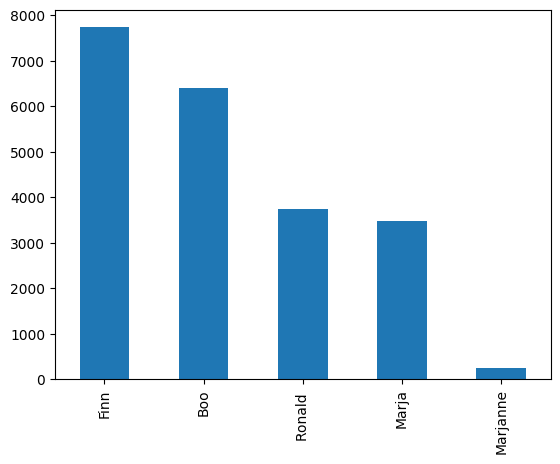

In [219]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df['Profile Name'].value_counts().plot(kind='bar')
plt.show()

What is the total watch time?

In [220]:
df['Duration'].sum()

Timedelta('364 days 23:41:52')

Period of given data

In [221]:
df.sort_values('Start Time')

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
17612,Marja,2015-05-01 09:57:47+00:00,0 days 00:13:16,NaN,Maleficent,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:09:06,Not latest view,NL (Netherlands)
17611,Marja,2015-05-01 10:23:55+00:00,0 days 00:01:11,NaN,Monsters University,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:01:11,Not latest view,NL (Netherlands)
17610,Marja,2015-05-01 10:25:21+00:00,0 days 00:00:05,NaN,Monsters University,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:00:05,Not latest view,NL (Netherlands)
17609,Marja,2015-05-01 10:25:39+00:00,0 days 00:12:59,NaN,Monsters University,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:13:01,Not latest view,NL (Netherlands)
17608,Marja,2015-05-01 15:40:35+00:00,0 days 00:00:19,NaN,Maleficent,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:00:11,00:00:11,NL (Netherlands)
...,...,...,...,...,...,...,...,...,...,...
6402,Finn,2023-08-21 10:27:00+00:00,0 days 00:00:44,Autoplayed: user action: None;,Seizoen 1 (Teaser): The Lincoln Lawyer,TEASER_TRAILER,Google Sabrina ATV Set Top Box,00:00:44,00:00:44,NL (Netherlands)
6401,Finn,2023-08-21 10:27:59+00:00,0 days 00:00:07,Autoplayed: user action: None;,The Memory Game_hook_04_16x9,HOOK,Google Sabrina ATV Set Top Box,00:00:08,00:00:08,NL (Netherlands)
6400,Finn,2023-08-21 10:28:14+00:00,0 days 00:00:01,Autoplayed: user action: None;,A Man Called Otto,NaN,Google Sabrina ATV Set Top Box,00:00:01,00:00:01,NL (Netherlands)
6399,Finn,2023-08-21 10:28:34+00:00,0 days 00:00:37,Autoplayed: user action: None;,Teaser: Avatar: The Last Airbender,TEASER_TRAILER,Google Sabrina ATV Set Top Box,00:00:37,00:00:37,NL (Netherlands)


Which Profile watched the most (time)?

In [222]:
df['Duration'].sum()

Timedelta('364 days 23:41:52')

Loged data

In [223]:
df.sort_values('Start Time')

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
17612,Marja,2015-05-01 09:57:47+00:00,0 days 00:13:16,NaN,Maleficent,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:09:06,Not latest view,NL (Netherlands)
17611,Marja,2015-05-01 10:23:55+00:00,0 days 00:01:11,NaN,Monsters University,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:01:11,Not latest view,NL (Netherlands)
17610,Marja,2015-05-01 10:25:21+00:00,0 days 00:00:05,NaN,Monsters University,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:00:05,Not latest view,NL (Netherlands)
17609,Marja,2015-05-01 10:25:39+00:00,0 days 00:12:59,NaN,Monsters University,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:13:01,Not latest view,NL (Netherlands)
17608,Marja,2015-05-01 15:40:35+00:00,0 days 00:00:19,NaN,Maleficent,NaN,Panasonic BD 2014 MT8561 Blu-ray Player,00:00:11,00:00:11,NL (Netherlands)
...,...,...,...,...,...,...,...,...,...,...
6402,Finn,2023-08-21 10:27:00+00:00,0 days 00:00:44,Autoplayed: user action: None;,Seizoen 1 (Teaser): The Lincoln Lawyer,TEASER_TRAILER,Google Sabrina ATV Set Top Box,00:00:44,00:00:44,NL (Netherlands)
6401,Finn,2023-08-21 10:27:59+00:00,0 days 00:00:07,Autoplayed: user action: None;,The Memory Game_hook_04_16x9,HOOK,Google Sabrina ATV Set Top Box,00:00:08,00:00:08,NL (Netherlands)
6400,Finn,2023-08-21 10:28:14+00:00,0 days 00:00:01,Autoplayed: user action: None;,A Man Called Otto,NaN,Google Sabrina ATV Set Top Box,00:00:01,00:00:01,NL (Netherlands)
6399,Finn,2023-08-21 10:28:34+00:00,0 days 00:00:37,Autoplayed: user action: None;,Teaser: Avatar: The Last Airbender,TEASER_TRAILER,Google Sabrina ATV Set Top Box,00:00:37,00:00:37,NL (Netherlands)


The data into seconds

In [224]:
df.loc[df['Profile Name']=='Boo','Duration'].astype('timedelta64[s]').sum()

8266022.0

The vieuw time per profile in seconds

In [225]:
viewTime = {}
viewTime.update({"Boo": df.loc[df['Profile Name']=='Boo','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Finn": df.loc[df['Profile Name']=='Finn','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Marja": df.loc[df['Profile Name']=='Marja','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Marjanne": df.loc[df['Profile Name']=='Marjanne','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Ronald ": df.loc[df['Profile Name']=='Ronald ','Duration'].astype('timedelta64[s]').sum()})
viewTime

{'Boo': 8266022.0,
 'Finn': 9678476.0,
 'Marja': 5608972.0,
 'Marjanne': 349363.0,
 'Ronald ': 7632079.0}

Plotting the data

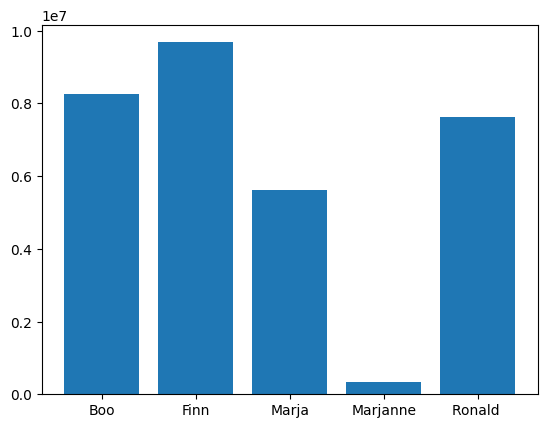

In [226]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.bar(*zip(*viewTime.items()))
plt.show()

What is the average watching time (per Profile)?

In [227]:
df['Profile Name'].value_counts()

Finn        7738
Boo         6399
Ronald      3736
Marja       3476
Marjanne     248
Name: Profile Name, dtype: int64

What type of video's?

In [228]:
df['Supplemental Video Type'].value_counts()

HOOK              464
TRAILER           390
TEASER_TRAILER     48
RECAP               4
Name: Supplemental Video Type, dtype: int64

Getting a sample

In [229]:
df.loc[df['Supplemental Video Type'].isnull()]

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Boo,2023-08-21 10:33:44+00:00,0 days 00:16:45,NaN,Sweet Tooth: Seizoen 2: In Captivity (Afleveri...,NaN,Chrome PC (Cadmium),00:34:01,00:34:01,NL (Netherlands)
1,Boo,2023-08-21 10:08:56+00:00,0 days 00:17:04,NaN,Sweet Tooth: Seizoen 2: In Captivity (Afleveri...,NaN,Chrome PC (Cadmium),00:17:16,Not latest view,NL (Netherlands)
3,Boo,2023-08-21 10:05:20+00:00,0 days 00:00:12,NaN,Sweet Tooth: Seizoen 2: In Captivity (Afleveri...,NaN,Chrome PC (Cadmium),00:00:12,Not latest view,NL (Netherlands)
6,Boo,2023-06-21 20:58:24+00:00,0 days 00:00:03,Autoplayed: user action: None;,The Confession Killer: Miniserie: War in Waco ...,NaN,Chrome PC (Cadmium),00:00:09,00:00:09,NL (Netherlands)
7,Boo,2023-06-21 20:45:17+00:00,0 days 00:11:38,NaN,The Confession Killer: Miniserie: Doe maar aar...,NaN,Chrome PC (Cadmium),00:47:42,00:47:42,NL (Netherlands)
...,...,...,...,...,...,...,...,...,...,...
21592,Ronald,2017-05-01 19:31:22+00:00,0 days 00:03:38,NaN,"13 Reasons Why: Seizoen 1: Tape 1, Side A (Afl...",NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:09:54,00:09:54,NL (Netherlands)
21593,Ronald,2017-04-23 21:49:31+00:00,0 days 00:00:09,NaN,Moving Art: Seizoen 1: Flowers (Aflevering 2),NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:00:09,Not latest view,NL (Netherlands)
21594,Ronald,2017-04-23 21:49:17+00:00,0 days 00:00:06,NaN,Moving Art: Seizoen 1: Oceans (Aflevering 1),NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:00:06,00:00:06,NL (Netherlands)
21595,Ronald,2017-04-23 21:49:01+00:00,0 days 00:00:08,Autoplayed: user action: None;,Moving Art: Seizoen 1: Oceans (Aflevering 1),NaN,Samsung 2016 Jazz-L UHD TV Smart TV,00:00:08,Not latest view,NL (Netherlands)


What is the value now?

In [230]:
df['Profile Name'].value_counts()

Finn        7738
Boo         6399
Ronald      3736
Marja       3476
Marjanne     248
Name: Profile Name, dtype: int64

What devices are used by which Profile? And which device is used the most?

In [231]:
df['Device Type'].value_counts()

Samsung 2016 Jazz-L UHD TV Smart TV        7485
Apple TV 3 (revised)                       4281
Chrome PC (Cadmium)                        2365
Apple iPad 2 WiFi                          1872
KPN KPNBroadcom Set Top Box                1555
LG 2018 LG O18 UHD TV Smart TV             1436
Apple iPad 5th Gen (Wi-Fi) iPad             785
Apple iPad 10.2 inch 8th Gen Wi-Fi iPad     421
Apple iPhone 6                              318
iPad Air Wi-Fi                              260
Edge OSS - Windows (Cadmium)                193
Apple iPhone SE Gen 2 iPhone                157
Google Sabrina ATV Set Top Box              156
Apple iPhone 4S                             102
LG 2018 Mstar LM18A STD UHD TV Smart TV      60
Panasonic BD 2014 MT8561 Blu-ray Player      53
iPhone 5S CDMA                               50
Apple iPhone 11                              15
Apple iPhone 7 (GSM)                         11
Apple iPad Air 4th Gen Wi-Fi iPad            10
KPN BCM72604 MVPD STB                   

Plotting the data

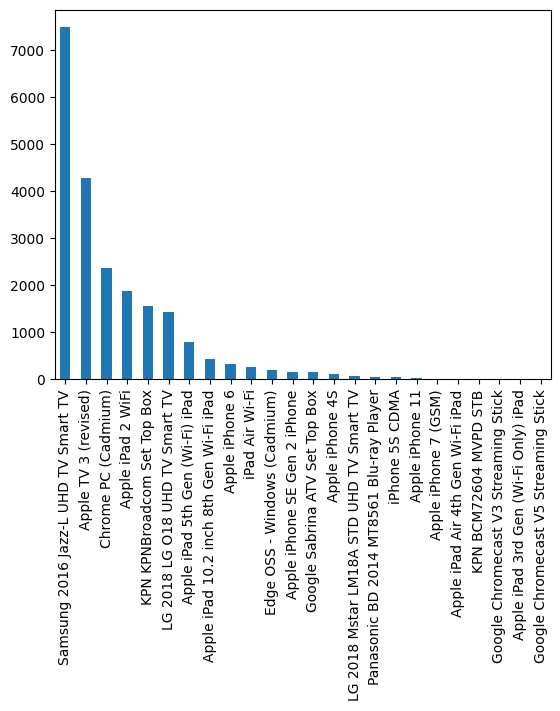

In [232]:
df['Device Type'].value_counts().plot(kind='bar')
plt.show()

Getting more info about my profile

In [233]:
df=df.loc[df['Profile Name'] == 'Boo']
df['Device Type'].value_counts()


Chrome PC (Cadmium)                        2326
Apple TV 3 (revised)                       1005
Samsung 2016 Jazz-L UHD TV Smart TV         855
Apple iPad 5th Gen (Wi-Fi) iPad             766
KPN KPNBroadcom Set Top Box                 550
Apple iPad 10.2 inch 8th Gen Wi-Fi iPad     421
iPad Air Wi-Fi                              216
Edge OSS - Windows (Cadmium)                193
iPhone 5S CDMA                               50
Apple iPhone 6                                9
Panasonic BD 2014 MT8561 Blu-ray Player       3
Google Chromecast V3 Streaming Stick          2
Apple iPad 2 WiFi                             2
Apple iPad 3rd Gen (Wi-Fi Only) iPad          1
Name: Device Type, dtype: int64

Plotting my data

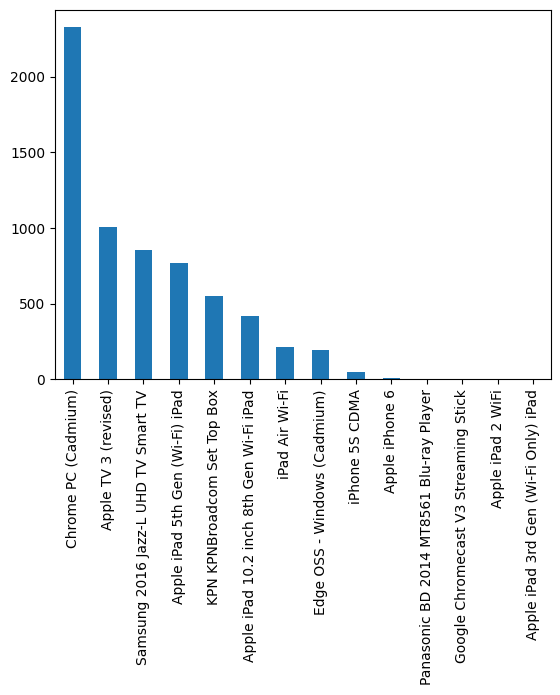

In [234]:
df['Device Type'].value_counts().plot(kind='bar')
plt.show()